<a href="https://colab.research.google.com/github/vkatsemba/SpamClassifier/blob/master/SpamClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

In [0]:
data = pd.read_csv("spam.csv",encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [0]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":"classification", "v2":"text"})

In [0]:
data.classification.value_counts()

ham     4825
spam     747
Name: classification, dtype: int64

In [0]:
data['spam'] = data['classification'].map( {'spam': 1, 'ham': 0} ).astype(int)
data.head(10)

,classification,text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [0]:
data['length'] = data['text'].apply(len)
data.head(10)

,classification,text,spam,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1,148
6,ham,Even my brother is not like to speak with me. ...,0,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0,160
8,spam,WINNER!! As a valued network customer you have...,1,158
9,spam,Had your mobile 11 months or more? U R entitle...,1,154


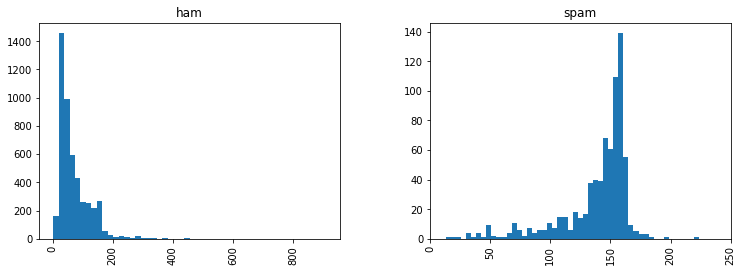

In [0]:
data.hist(column='length',by='classification',bins=50,figsize=(12,4));
plt.xlim(0,250);

In [0]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [0]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [0]:
def clean_text(text):
    punc_remove = [ch for ch in text if ch not in string.punctuation]
    punc_remove = "".join(punc_remove)
    return [word for word in punc_remove.split() if word.lower() not in stopwords.words('english')]

In [0]:
data["text"].head(10).apply(clean_text)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
5    [FreeMsg, Hey, darling, 3, weeks, word, back, ...
6    [Even, brother, like, speak, treat, like, aids...
7    [per, request, Melle, Melle, Oru, Minnaminungi...
8    [WINNER, valued, network, customer, selected, ...
9    [mobile, 11, months, U, R, entitled, Update, l...
Name: text, dtype: object

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [0]:
X = data['text']
y = data['spam']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179,)
(1393,)
(4179,)
(1393,)


In [0]:
vect.fit(X_train)
X_train_vect = vect.transform(X_train)
X_test_vect = vect.transform(X_test)

In [0]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [0]:
%time nb.fit(X_train_vect, y_train)

Wall time: 2.99 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
from sklearn.metrics import accuracy_score
y_pred = nb.predict(X_test_vect)
accuracy_score(y_test, y_pred)

0.9856424982053122

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1205,    8],
       [  12,  168]], dtype=int64)

In [0]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1213
           1       0.95      0.93      0.94       180

   micro avg       0.99      0.99      0.99      1393
   macro avg       0.97      0.96      0.97      1393
weighted avg       0.99      0.99      0.99      1393



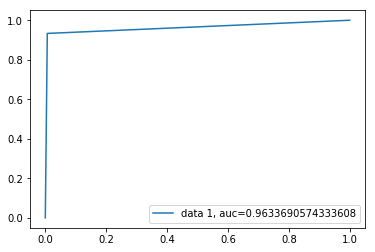

In [0]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [0]:
mnb_clf = Pipeline([('vect', CountVectorizer(analyzer = clean_text)),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
                     ])

In [0]:
mnb_clf.fit(X_train, y_train)
mnb_pred = mnb_clf.predict(X_test)
print(metrics.classification_report(y_test, mnb_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1213
           1       1.00      0.74      0.85       180

   micro avg       0.97      0.97      0.97      1393
   macro avg       0.98      0.87      0.92      1393
weighted avg       0.97      0.97      0.96      1393



In [0]:
accuracy_score(y_test, mnb_pred)

0.9669777458722182

In [0]:
confusion_matrix(y_test, mnb_pred)

array([[1213,    0],
       [  46,  134]], dtype=int64)

In [0]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [0]:
svm_clf = Pipeline([('vect', CountVectorizer(analyzer = clean_text)),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC()),
                     ])

In [0]:
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
print(metrics.classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1213
           1       0.99      0.91      0.95       180

   micro avg       0.99      0.99      0.99      1393
   macro avg       0.99      0.95      0.97      1393
weighted avg       0.99      0.99      0.99      1393



In [0]:
confusion_matrix(y_test, svm_pred)

array([[1212,    1],
       [  17,  163]], dtype=int64)

In [0]:
accuracy_score(y_test, svm_pred)

0.9870782483847811

In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [0]:
sgd_clf = Pipeline([ ('bow'  , CountVectorizer(analyzer = clean_text) ),
                   ('tfidf'   , TfidfTransformer()),
                   ('clf_SGD' , SGDClassifier(random_state=1)),
                    ])

In [0]:
sgd_clf.fit(X_train, y_train)
sgd_pred = sgd_clf.predict(X_test)
print(metrics.classification_report(y_test,sgd_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1213
           1       0.99      0.92      0.95       180

   micro avg       0.99      0.99      0.99      1393
   macro avg       0.99      0.96      0.97      1393
weighted avg       0.99      0.99      0.99      1393



In [0]:
confusion_matrix(y_test, sgd_pred)

array([[1211,    2],
       [  15,  165]], dtype=int64)

In [0]:
accuracy_score(y_test, sgd_pred)

0.9877961234745154